In [232]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid-data.csv")

In [233]:
countries = df['location'].unique()
# print(countries)


COUNTRIES = ['Afghanistan', 'Argentina', 'India', 'Germany', 'Japan', 'China', 'Russia', 'Nepal', 'Israel']
BIG_WAVE_LEFT = [400, 600, 400, 650, 870, 750, 700, 400, 650]
BIG_WAVE_RIGHT = [600, 760, 600, 850, 1000, 900, 800, 600, 780]

# TYPE = ['High income', 'Low middle income', 'Low income', 'Upper middle income']

In [234]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [235]:
data = {}

for country in countries:
    data[country] = df[df.location == country]['new_cases'].dropna().values

In [236]:
def smoothen(df, period):
    df_ma = df.copy()
    for i in range(period, len(df)):
        ma = 0
        for j in range(i - period + 1, i + 1):
            ma += df[j]
        df_ma[i] = ma / period
    return df_ma

In [251]:
from numpy import array, exp
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


def quad_func(x, a, b, c):
    return a * (x ** 2) + b * x + c

def cubic_func(x, a, b, c, d):
    return (a * (x ** 3)) + (b * (x ** 2)) + (c * (x ** 1)) + d

def quartic_func(x, a, b, c, d, e):
    return a * (x ** 4) + b * (x ** 3) + c * (x ** 2) + d * x + e

def gauss(x, H, A, mu, sigma):
    return H + A * np.exp(-((x - mu) / sigma) ** 2)

def RMSE(a, b):
    return np.sqrt(np.sum((a - b) ** 2)) / len(a)

def weib(x, H, A, mu, a):
    return H + A * (x-mu) * np.exp(-((x-mu)/a)**2)

def plot_graph(df, func_type):
    x = np.arange(0, len(df))
    y_pred = None
    if func_type == "quadratic":
        params, _ = curve_fit(quad_func, x, df)
        a, b, c = params[0], params[1], params[2]
        y_pred = quad_func(x, a, b, c)
        
    elif func_type == "cubic":
        params, _ = curve_fit(cubic_func, x, df)
        a, b, c, d = params[0], params[1], params[2], params[3]
        y_pred = cubic_func(x, a, b, c, d)
    
    elif func_type == "quartic":
        params, _ = curve_fit(quartic_func, x, df)
        a, b, c, d, e = params[0], params[1], params[2], params[3], params[4]
        y_pred = quartic_func(x, a, b, c, d, e)
        
    elif func_type == "bell":
        params, _ = curve_fit(gauss, x, df)
        H, A, x0, sigma = params[0], params[1], params[2], params[3]
        y_pred = gauss(x, H, A, x0, sigma)
    elif func_type == "weibull":
        params, _ = curve_fit(weib, x, df)
        H, A, mu, a = params[0], params[1], params[2], params[3]
        y_pred = weib(x, H, A, mu, a)
    
    
    plt.figure()
    plt.title(str(func_type))
    plt.plot(x, df, label="actual")
    plt.plot(x, y_pred, label="RMSE = " + str(RMSE(y_pred, df)))
    plt.xlabel('day')
    plt.ylabel('covid cases')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def find_best_curve(df, title = ""):
    x = np.arange(0, len(df))
    y_pred = None
    RMSE_quad = 0
    RMSE_cubic = 0
    RMSE_quartic = 0
    RMSE_bell = 0
    
    params, _ = curve_fit(quad_func, x, df)
    a, b, c = params[0], params[1], params[2]
    y_pred_quad = quad_func(x, a, b, c)
    RMSE_quad = RMSE(y_pred_quad, df)
        
    params, _ = curve_fit(cubic_func, x, df)
    a, b, c, d = params[0], params[1], params[2], params[3]
    y_pred_cubic = cubic_func(x, a, b, c, d)
    RMSE_cubic = RMSE(y_pred_cubic, df)
        
    params, _ = curve_fit(quartic_func, x, df)
    a, b, c, d, e = params[0], params[1], params[2], params[3], params[4]
    y_pred_quartic = quartic_func(x, a, b, c, d, e)
    RMSE_quartic = RMSE(y_pred_quartic, df)
        
    params, _ = curve_fit(gauss, x, df)
    H, A, x0, sigma = params[0], params[1], params[2], params[3]
    y_pred_bell = gauss(x, H, A, x0, sigma)
    RMSE_bell = RMSE(y_pred_bell, df)
    
    params, _ = curve_fit(weib, x, df)
    H, A, mu, a = params[0], params[1], params[2], params[3]
    y_pred_weib = weib(x, H, A, mu, a)
    RMSE_weib = RMSE(y_pred_weib, df)
    
    func_type = "None"
    if (RMSE_quad == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: quadratic function")
        func_type = 'quadratic function'
        y_pred = y_pred_quad
    
    if (RMSE_quad == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: quadratic function")
        func_type = 'quadratic function'
        y_pred = y_pred_quad
    elif (RMSE_cubic == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: cubic function")
        func_type = 'cubic function'
        y_pred = y_pred_cubic
    elif (RMSE_quartic == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: quaratic function")
        func_type = 'quadratic function'
        y_pred = y_pred_quartic
    elif (RMSE_bell == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: bell function")
        func_type = 'bell function'
        y_pred = y_pred_bell
    elif (RMSE_weib == min(RMSE_quad, RMSE_cubic, RMSE_quartic, RMSE_bell, RMSE_weib)):
        print("Best fit function is: weibull function with gamma = 2")
        func_type = 'weibull function'
        y_pred = y_pred_weib
        
    plt.figure()
    plt.title(str(func_type) + " " + str(title))
    plt.plot(x, df, label="actual")
    plt.plot(x, y_pred, label="RMSE = " + str(RMSE(y_pred, df)))
    plt.xlabel('day')
    plt.ylabel('covid cases')
    plt.grid(True)
    plt.legend()
    plt.show()

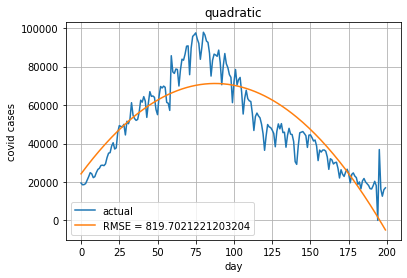

In [255]:
plot_graph(data['India'][150:350], 'quadratic')

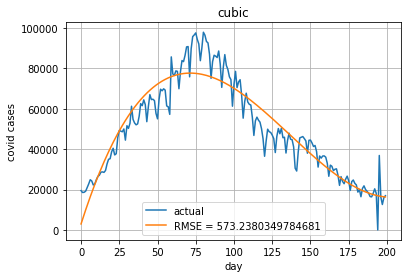

In [254]:
plot_graph(data['India'][150:350], 'cubic')

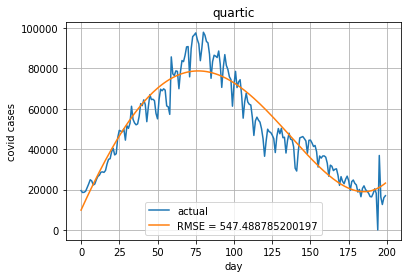

In [256]:
plot_graph(data['India'][150:350], 'quartic')

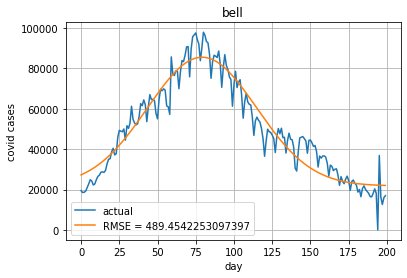

In [257]:
plot_graph(data['India'][150:350], 'bell')

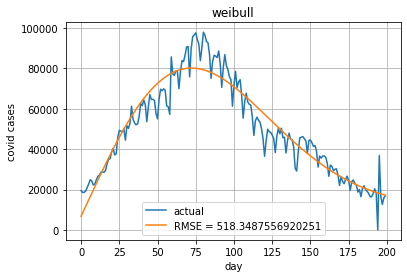

In [258]:
plot_graph(data['India'][150:350], 'weibull')

Best fit function is: bell function


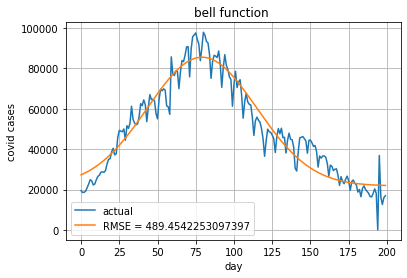

In [239]:
find_best_curve(data['India'][150:350])

Best fit function is: bell function


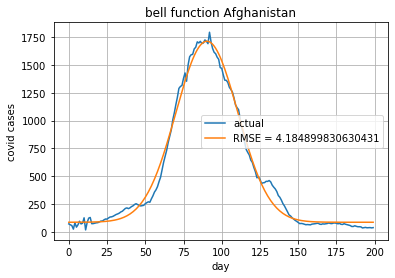

Best fit function is: bell function


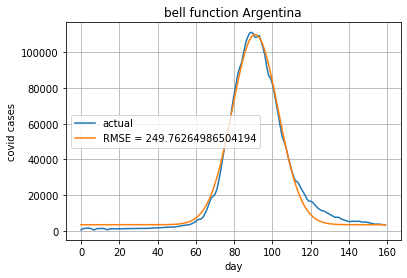

Best fit function is: bell function


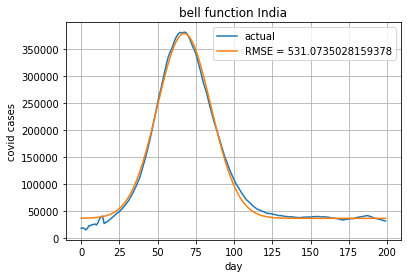

Best fit function is: bell function


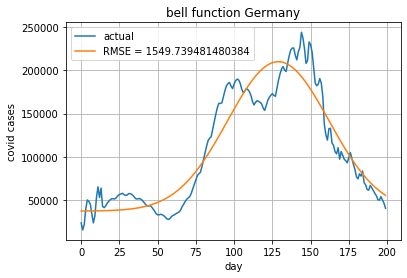

C:\Users\Abhishek Sharma\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Best fit function is: bell function


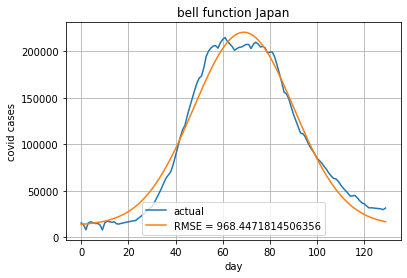

Best fit function is: bell function


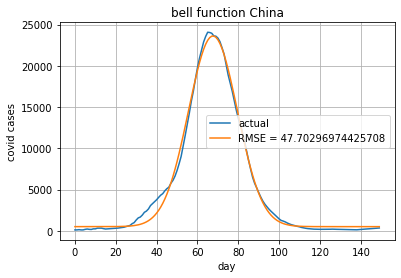

Best fit function is: bell function


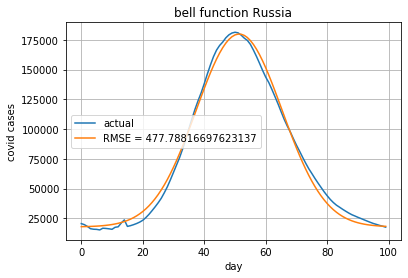

Best fit function is: bell function


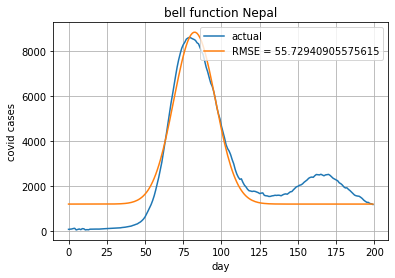

Best fit function is: bell function


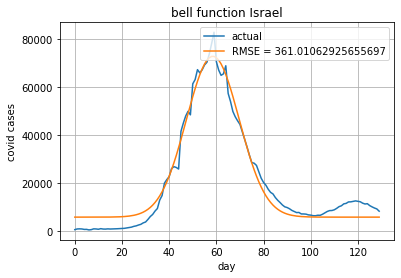

In [240]:
for i in range(len(COUNTRIES)):
    find_best_curve(smoothen(data[COUNTRIES[i]][BIG_WAVE_LEFT[i]:BIG_WAVE_RIGHT[i]], 15), COUNTRIES[i])

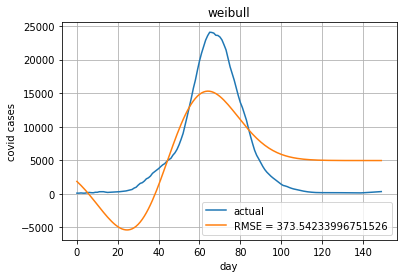

In [253]:
plot_graph(smoothen(data[COUNTRIES[5]][BIG_WAVE_LEFT[5]:BIG_WAVE_RIGHT[5]], 15), 'weibull')